<a href="https://colab.research.google.com/github/afrarafeeqa2004/machine-learning/blob/main/spamdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/spam_ham_dataset.csv")

In [7]:
print(data.head())
print(data.info())

   Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB
None


In [8]:
X = data["text"]
y = data["label_num"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [10]:
count_vect = CountVectorizer(stop_words="english")
X_train_counts = count_vect.fit_transform(X_train)
X_test_counts = count_vect.transform(X_test)

In [11]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

In [12]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [13]:
y_pred = model.predict(X_test_tfidf)

In [14]:
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.923671497584541

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       742
           1       1.00      0.73      0.84       293

    accuracy                           0.92      1035
   macro avg       0.95      0.87      0.90      1035
weighted avg       0.93      0.92      0.92      1035



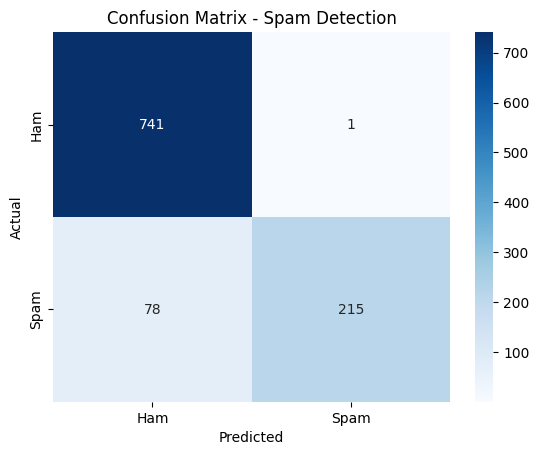

In [15]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Ham", "Spam"],
            yticklabels=["Ham", "Spam"])
plt.title("Confusion Matrix - Spam Detection")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [16]:
def predict_message(message):
    msg_counts = count_vect.transform([message])
    msg_tfidf = tfidf_transformer.transform(msg_counts)
    prediction = model.predict(msg_tfidf)[0]
    return "Spam 🚫" if prediction == 1 else "Ham ✅"

# Example
print(predict_message("Congratulations! You won a $1000 prize. Click here!"))
print(predict_message("Are we still meeting tomorrow at 10am?"))

Spam 🚫
Ham ✅
